# Causal inference between Epidemic time series

In [14]:
from pysus.online_data import SINAN
import pandas as pd
import os
import numpy as np
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
pd.options.plotting.backend = "plotly"

## Obtaining the Data
We will use [PySUS library](https://pysus.readthedocs.io) to download time series of cases of malaria and dengue for the state of Amazonas, Brazil.

In [2]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Cancer',
 'Chagas',
 'Chikungunya',
 'Colera',
 'Coqueluche',
 'Contact Communicable Disease',
 'Acidentes de Trabalho',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Sífilis Adquirida',
 'Sífilis Congênita',
 'Sífilis em Gestante',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica',
 'Zika']

### Malaria Incidence
Malaria cases are mainly reported on SIVEP-Malaria, not on SINAN. Therefore the few cases that end up in SINAN are not enough for reconstructing its temporal dynamics.

In [3]:
SINAN.get_available_years('Malaria')

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")


['MALABR04.dbc',
 'MALABR05.dbc',
 'MALABR06.dbc',
 'MALABR07.dbc',
 'MALABR08.dbc',
 'MALABR09.dbc',
 'MALABR10.dbc',
 'MALABR11.dbc',
 'MALABR12.dbc',
 'MALABR13.dbc',
 'MALABR14.dbc',
 'MALABR15.dbc',
 'MALABR16.dbc',
 'MALABR17.dbc',
 'MALABR18.dbc']

In [6]:
maldf = df = SINAN.download(year=2004,disease='Malaria')
# maldf = maldf[maldf.SG_UF_NOT=='13']
for ano in range(2005,2020):
    print(f"Downloading {ano} year")
    try:
        df = SINAN.download(ano,'Malaria')
#         df = df[df.SG_UF_NOT=='13']
        maldf = pd.concat([maldf, df])
    except:
        print(f"Download of {ano} failed")

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning: Now SINAN tables are no longer split by state. Returning countrywide years
  warnings.warn("Now SINAN tables are no longer split by state. Returning countrywide years")
/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning: Now SINAN tables are no longer split by state. Returning country table
  warnings.warn("Now SINAN tables are no longer split by state. Returning country table")


In [7]:
maldf

ID_MUNICIP ID_UNIDADE  DT_NOTIFIC CS_RACA CS_ESCOLAR NU_ANO SEM_NOT  \
0       2708006    2004054  2004-01-26       4          3   2004  042004   
1       2704302    0008133  2004-02-04                      2004  052004   
2       2704302    2720035  2004-01-06       4          9   2004  012004   
3       2704302    2720035  2004-01-07       1          9   2004  012004   
4       2704302    2720035  2004-01-02       4          9   2004  532003   
...         ...        ...         ...     ...        ...    ...     ...   
4020     317020    2152436  2019-12-30       1        NaN   2019  202001   
4021     310620    0027049  2019-12-30       1        NaN   2019  202001   
4022     310620    0027049  2019-12-30       1        NaN   2019  202001   
4023     317020    2152436  2019-12-31       4        NaN   2019  202001   
4024     240810    4013484  2019-12-31       4        NaN   2019  202001   

     SG_UF_NOT ID_REGIONA  DT_SIN_PRI  ... TRA_ESQUEM  \
0           AL        008  2004-01-20  ...        NaN   
1           AL             2004-01-02  ...        NaN   
2           AL        001  2003-12-30  ...        NaN   
3           AL        001  2004-01-01  ...        NaN   
4           AL        001  2004-01-01  ...        NaN   
...        ...        ...         ...  ...        ...   
4020        31       1462  2019-12-14  ...          1   
4021        31       1449  2019-06-30  ...              
4022        31       1449  2019-12-30  ...              
4023        31       1462  2019-12-24  ...         99   
4024        24       1416  2019-12-23  ...              

                      DSTRAESQUE DT_ENCERRA   DT_DIGITA DT_TRANSUS DT_TRANSDM  \
0                            NaN        NaN         NaN        NaN        NaN   
1                            NaN        NaN         NaN        NaN        NaN   
2                            NaN        NaN         NaN        NaN        NaN   
3                            NaN        NaN         NaN        NaN        NaN   
4                            NaN        NaN         NaN        NaN        NaN   
...                          ...        ...         ...        ...        ...   
4020                                   None  2020-01-06       None       None   
4021                                   None  2020-03-10       None       None   
4022                                   None  2020-03-09       None       None   
4023  ARTESUNATO + MEFLO 100+200       None  2020-01-07       None       None   
4024                                   None  2020-01-03       None       None   

      DT_TRANSSM DT_TRANSRM DT_TRANSRS DT_TRANSSE  
0            NaN        NaN        NaN        NaN  
1            NaN        NaN        NaN        NaN  
2            NaN        NaN        NaN        NaN  
3            NaN        NaN        NaN        NaN  
4            NaN        NaN        NaN        NaN  
...          ...        ...        ...        ...  
4020  2020-01-14       None       None       None  
4021        None       None       None       None  
4022        None       None       None       None  
4023  2020-01-14       None       None       None  
4024        None       None       None       None  

[52776 rows x 98 columns]

In [8]:
maldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52776 entries, 0 to 4024
Data columns (total 98 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_MUNICIP  52776 non-null  object 
 1   ID_UNIDADE  52776 non-null  object 
 2   DT_NOTIFIC  52776 non-null  object 
 3   CS_RACA     52776 non-null  object 
 4   CS_ESCOLAR  12026 non-null  object 
 5   NU_ANO      52776 non-null  object 
 6   SEM_NOT     52776 non-null  object 
 7   SG_UF_NOT   52776 non-null  object 
 8   ID_REGIONA  52776 non-null  object 
 9   DT_SIN_PRI  52732 non-null  object 
 10  SEM_PRI     52776 non-null  object 
 11  NU_IDADE    12026 non-null  object 
 12  CS_SEXO     52776 non-null  object 
 13  ID_MN_RESI  52776 non-null  object 
 14  SG_UF       52776 non-null  object 
 15  ID_PAIS     52776 non-null  object 
 16  ID_DG_NOT   12026 non-null  object 
 17  ID_EV_NOT   12026 non-null  object 
 18  ANT_DT_INV  11690 non-null  object 
 19  OCUPACAO    12026 non-null

In [9]:
for c in maldf.columns:
    if c.startswith('DT_'):
        maldf[c] = pd.to_datetime(maldf[c])

In [10]:
maldf.set_index('DT_SIN_PRI', inplace=True)

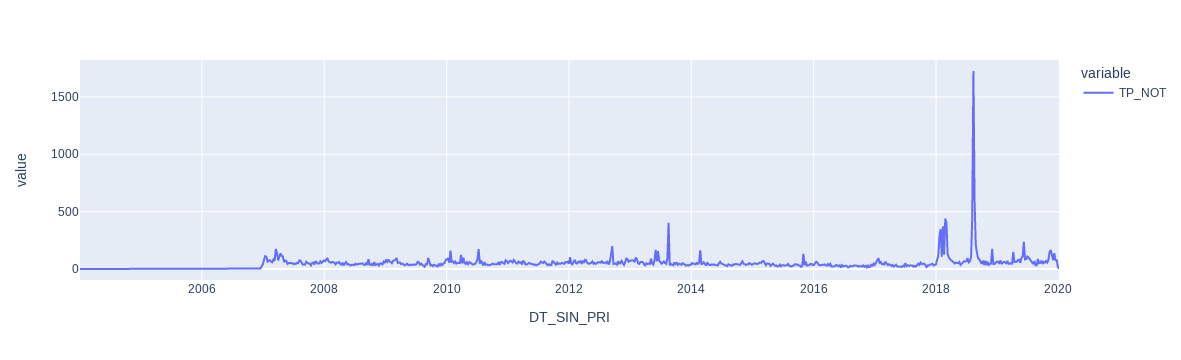

In [11]:
fig = maldf.loc["2004-01-01":].resample('W').count().TP_NOT.plot();
fig.show()

#### SIVEP Malaria series
Luckily we have the weekly cases of malaria from SIVEP as a file

In [3]:
malsivep = pd.read_csv('mal_inc_AM.csv.gz')
malsivep

DT_SINTO  COD_NOTI
0    2003-01-05      1888
1    2003-01-12      4701
2    2003-01-19      2186
3    2003-01-26      2109
4    2003-02-02      2176
..          ...       ...
932  2020-11-15         0
933  2020-11-22         0
934  2020-11-29         0
935  2020-12-06       821
936  2020-12-13       105

[937 rows x 2 columns]

In [4]:
malsivep.set_index('DT_SINTO', inplace=True)

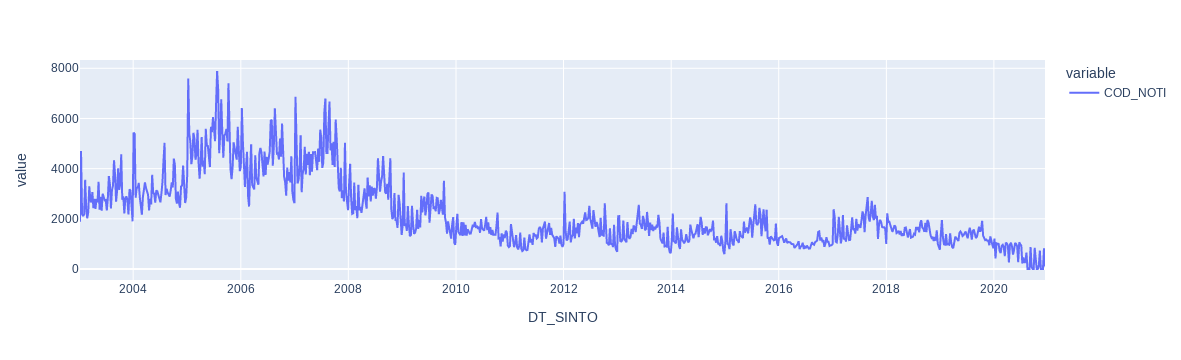

In [5]:
fig=malsivep.plot();
fig.show()

The malaria series is quite noisy let's smooth it a little

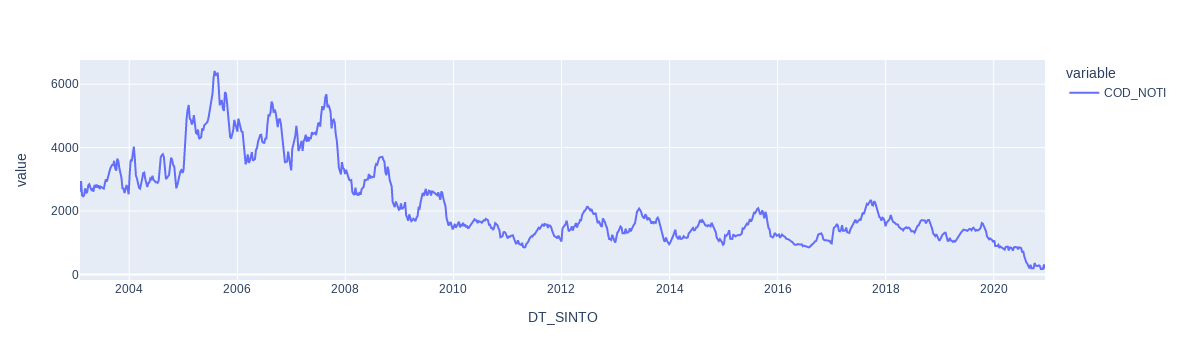

In [6]:
fig=malsivep.rolling(5).mean().dropna().plot();
fig.show()

### Dengue Incidence

In [8]:
SINAN.get_available_years('Dengue')

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years



['DENGBR00.dbc',
 'DENGBR01.dbc',
 'DENGBR02.dbc',
 'DENGBR03.dbc',
 'DENGBR04.dbc',
 'DENGBR05.dbc',
 'DENGBR06.dbc',
 'DENGBR07.dbc',
 'DENGBR08.dbc',
 'DENGBR09.dbc',
 'DENGBR10.dbc',
 'DENGBR11.dbc',
 'DENGBR12.dbc',
 'DENGBR13.dbc',
 'DENGBR14.dbc',
 'DENGBR15.dbc',
 'DENGBR16.dbc',
 'DENGBR17.dbc',
 'DENGBR18.dbc',
 'DENGBR19.dbc',
 'DENGBR20.dbc']

In [9]:
def convert_dates(df):
    for c in df.columns:
        if c.startswith('DT_'):
            df[c] = pd.to_datetime(df[c],errors='coerce')
    return df

In [11]:
ano = 2013
denguefn =  SINAN.download(ano,'Dengue', return_fname=True)
dendf = pd.read_csv(denguefn, usecols=['DT_SIN_PRI', 'TP_NOT','SG_UF_NOT'])
os.unlink(denguefn)

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning:

Now SINAN tables are no longer split by state. Returning country table



In [12]:
dendf = dendf.convert_dtypes()
dendf = convert_dates(dendf)
dendf.set_index('DT_SIN_PRI', inplace=True)
dendf['SG_UF_NOT'] = dendf.SG_UF_NOT.astype(int)
dendf = dendf[dendf.SG_UF_NOT==13] #13 is the Amazonas code
dendf

TP_NOT  SG_UF_NOT
DT_SIN_PRI                   
2013-05-02       2         13
2012-12-31       2         13
2013-01-03       2         13
2013-01-04       2         13
2013-01-06       2         13
...            ...        ...
2013-06-17       2         13
2013-04-18       2         13
2013-07-16       2         13
2013-06-02       2         13
2013-01-23       2         13

[24547 rows x 2 columns]

In [13]:
dendf.loc["2013-01-01":].resample('W').count().TP_NOT.to_csv(f'dengue_{ano}.csv.gz')

In [16]:
for ano in range(2014,2020):
    print(f"Downloading {ano} year")
    dfname = SINAN.download(ano,'Dengue', return_fname=True)
    df = pd.read_csv(dfname, usecols=['DT_SIN_PRI', 'TP_NOT','SG_UF_NOT'])
    os.unlink(dfname)
    df = convert_dates(df)
    df.set_index('DT_SIN_PRI', inplace=True)
    df['SG_UF_NOT'] = df.SG_UF_NOT.astype(int)
    df = df[df.SG_UF_NOT==13]
    df.loc["2013-01-01":].resample('W').count().TP_NOT.to_csv(f'dengue_{ano}.csv.gz')

    

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning:

Now SINAN tables are no longer split by state. Returning country table

/tmp/ipykernel_112068/1736534747.py:10: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years



/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning:

Now SINAN tables are no longer split by state. Returning country table

/tmp/ipykernel_112068/1736534747.py:10: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years



/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning:

Now SINAN tables are no longer split by state. Returning country table

/tmp/ipykernel_112068/1736534747.py:10: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years



/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning:

Now SINAN tables are no longer split by state. Returning country table

/tmp/ipykernel_112068/1736534747.py:10: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years



/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning:

Now SINAN tables are no longer split by state. Returning country table

/tmp/ipykernel_112068/1736534747.py:10: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:60: UserWarning:

Now SINAN tables are no longer split by state. Returning countrywide years



/usr/local/lib/python3.10/dist-packages/PySUS-0.6.0-py3.10-linux-x86_64.egg/pysus/online_data/SINAN.py:85: UserWarning:

Now SINAN tables are no longer split by state. Returning country table

/tmp/ipykernel_112068/1736534747.py:10: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [23]:
dengueseries = pd.read_csv('dengue_2013.csv.gz')
for ano in range(2014,2020):
    df = pd.read_csv(f'dengue_{ano}.csv.gz')
    dengueseries = pd.concat([dengueseries,df])
dengueseries['DT_SIN_PRI'] = pd.to_datetime(dengueseries.DT_SIN_PRI)
dengueseries.set_index('DT_SIN_PRI', inplace=True)
dengueseries = dengueseries.resample('W').sum() # Some files have overlapping series

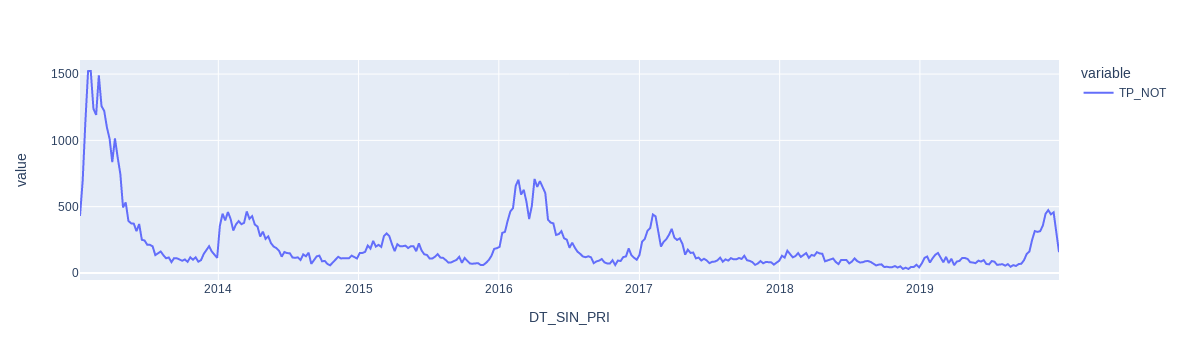

In [24]:
fig = dengueseries.plot();
fig.show()

## Looking at the correlation between the series
The dengue series is shorter. so we will need to cut the malaria series to make it match the dengue series.

In [25]:
dengueseries.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='DT_SIN_PRI', length=365, freq='W-SUN')

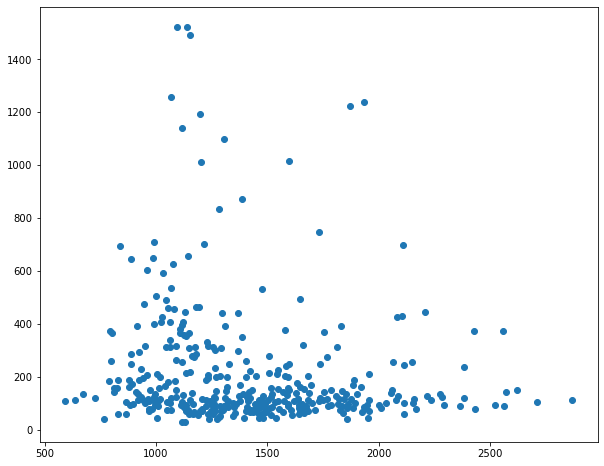

In [26]:
pylab.scatter(malsivep.loc['2013-01-01':'2019-12-29'].values, dengueseries.values);

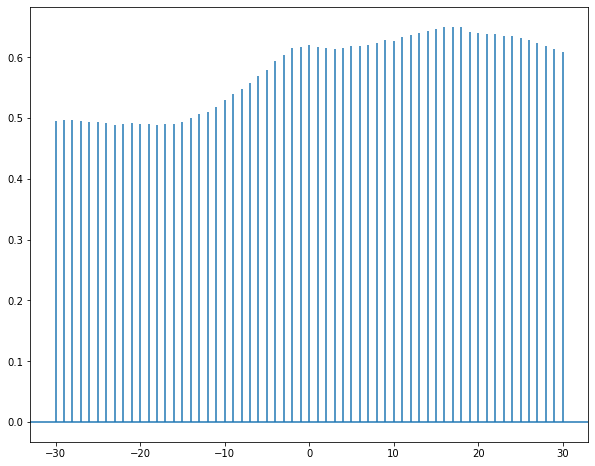

In [35]:
pylab.xcorr(malsivep.loc['2013-01-06':'2019-12-29'].values.ravel(), dengueseries.astype(float).values.ravel(),maxlags=30);

In [32]:
malsivep.loc['2013-01-06':'2019-12-29'].values.shape

(365, 1)

In [33]:
dengueseries.astype(float).values.shape

(365, 1)

In [36]:
from statsmodels.tsa.stattools import grangercausalitytests

In [40]:
grangercausalitytests(np.array([malsivep.loc['2013-01-06':'2019-12-29'].values.ravel(),dengueseries.astype(float).values.ravel()]).T, maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3144  , p=0.1291  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=2.3336  , p=0.1266  , df=1
likelihood ratio test: chi2=2.3262  , p=0.1272  , df=1
parameter F test:         F=2.3144  , p=0.1291  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3121  , p=0.2706  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=2.6608  , p=0.2644  , df=2
likelihood ratio test: chi2=2.6511  , p=0.2657  , df=2
parameter F test:         F=1.3121  , p=0.2706  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5938  , p=0.6194  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=1.8166  , p=0.6113  , df=3
likelihood ratio test: chi2=1.8121  , p=0.6123  , df=3
parameter F test:         F=0.5938  , p=0.6194  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9746  , p=0.4214  

{1: ({'ssr_ftest': (2.3144104215505243, 0.1290552918611737, 361.0, 1),
   'ssr_chi2test': (2.333643749153437, 0.12660521497601637, 1),
   'lrtest': (2.326194946470423, 0.12721249799741935, 1),
   'params_ftest': (2.314410421677409, 0.1290552918507202, 361.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.312073021690809, 0.2705529007116875, 358.0, 2),
   'ssr_chi2test': (2.660796127786389, 0.2643720034026035, 2),
   'lrtest': (2.6510916811703282, 0.2656579126359208, 2),
   'params_ftest': (1.3120730216946612, 0.2705529007106597, 358.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5938397711839201, 0.6193923253702135, 355.0, 3),
   'ssr_chi2test': (1.8166478633964425, 0.6113188925384578, 3),
   'lrtest': (1.8121047560098305, 0.6123043545877476, 3),
   'params_ftest': (0.5938397711873808, 0.6193923253679587, 355.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [41]:
grangercausalitytests(np.array([dengueseries.astype(float).values.ravel(), malsivep.loc['2013-01-06':'2019-12-29'].values.ravel()]).T, maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2784  , p=0.5981  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.2807  , p=0.5962  , df=1
likelihood ratio test: chi2=0.2806  , p=0.5963  , df=1
parameter F test:         F=0.2784  , p=0.5981  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5036  , p=0.0832  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=5.0771  , p=0.0790  , df=2
likelihood ratio test: chi2=5.0419  , p=0.0804  , df=2
parameter F test:         F=2.5036  , p=0.0832  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5811  , p=0.0141  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=10.9551 , p=0.0120  , df=3
likelihood ratio test: chi2=10.7926 , p=0.0129  , df=3
parameter F test:         F=3.5811  , p=0.0141  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.2972  , p=0.0021  

{1: ({'ssr_ftest': (0.27841886203017885, 0.5980635780911423, 361.0, 1),
   'ssr_chi2test': (0.2807325921855543, 0.5962214514771558, 1),
   'lrtest': (0.28062439123823424, 0.5962922604026721, 1),
   'params_ftest': (0.27841886203036503, 0.5980635780909841, 361.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5035894394476057, 0.08322206759458768, 358.0, 2),
   'ssr_chi2test': (5.077111544801569, 0.0789803831110198, 2),
   'lrtest': (5.041933582596357, 0.08038185669196765, 2),
   'params_ftest': (2.5035894394468716, 0.08322206759464802, 358.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.581091294027669, 0.014105617898698172, 355.0, 3),
   'ssr_chi2test': (10.955113085391686, 0.011971088823378386, 3),
   'lrtest': (10.792617436901764, 0.012901790297593713, 3),
   'params_ftest': (3.581091294027749, 0.01410561789869687, 355.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,

## Applying Convergent Cross-Mapping
Let's start applying the CCM method by testing the malaria $\rightarrow$ dengue causality.

In [42]:
import neurokit2 as nk

{'Delay': 8, 'Dimension': 5, 'Tolerance': 336.91420810288423}

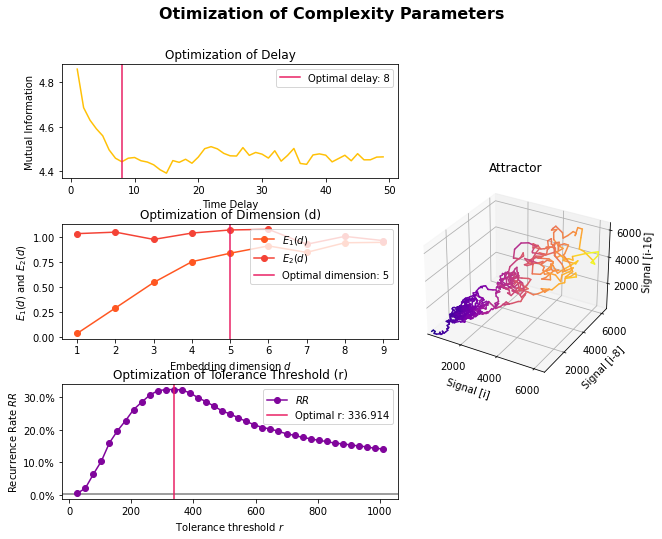

In [43]:
parameters = nk.complexity_optimize(malsivep.rolling(5).mean().dropna().values[:,0], show=True)
parameters

Although we have estimated the parameters for reconstruction from the entire malaria series, for training the predictive model, we need to slice the series to the same period as the dengue series.

In [44]:
malseries = malsivep.loc['2013-01-01':'2019-12-29']
malrec = pd.DataFrame(data={'mal':malseries.values[:,0]})
tau = 8
malrec['lag1'] = malrec.mal.shift(1*tau)
malrec['lag2'] = malrec.mal.shift(2*tau)
malrec['lag3'] = malrec.mal.shift(3*tau)
malrec['lag4'] = malrec.mal.shift(4*tau)
malrec['lag5'] = malrec.mal.shift(5*tau)
malrec = malrec.dropna()
malrec

mal    lag1    lag2    lag3    lag4    lag5
40   1859  1547.0  2114.0  1646.0  1066.0  2103.0
41   1206  1768.0  1958.0  1475.0  1871.0  2108.0
42   1064  1513.0  1544.0  1830.0  1305.0  1118.0
43   1019  1683.0  1595.0  2429.0  1202.0  1096.0
44   1451  1575.0  2274.0  2558.0  1282.0  1141.0
..    ...     ...     ...     ...     ...     ...
360   948  1569.0  1518.0  1445.0  1227.0   989.0
361  1296  1920.0  1569.0  1494.0  1153.0   970.0
362  1079  1327.0  1397.0  1354.0  1117.0  1424.0
363   953  1236.0  1233.0  1223.0  1443.0  1051.0
364   823  1150.0  1289.0  1469.0  1495.0   867.0

[325 rows x 6 columns]

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score

In [46]:
n_neighbors = 3
X = malrec[['mal','lag1','lag2', 'lag3','lag4','lag5']]
y = dengueseries[5*tau:]
knn = KNeighborsRegressor(n_neighbors, weights='distance', metric='euclidean')
knn.fit(X.iloc[:200], y[:200])
y_ = knn.predict(X.iloc[200:])

In [57]:
y.values.shape

(325, 1)

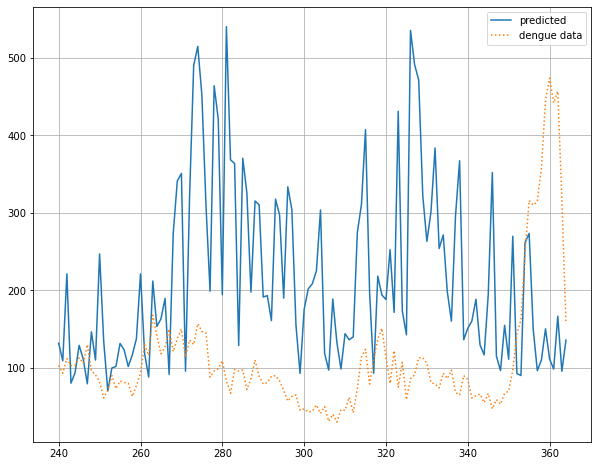

In [58]:
pylab.plot(X.index[200:],y_, label='predicted')
pylab.plot(X.index[200:],y.values[200:,0],':',label='dengue data')
pylab.grid()
pylab.legend();

In [61]:
knn.score(X.iloc[200:],y.values[200:])

-3.647131481474969

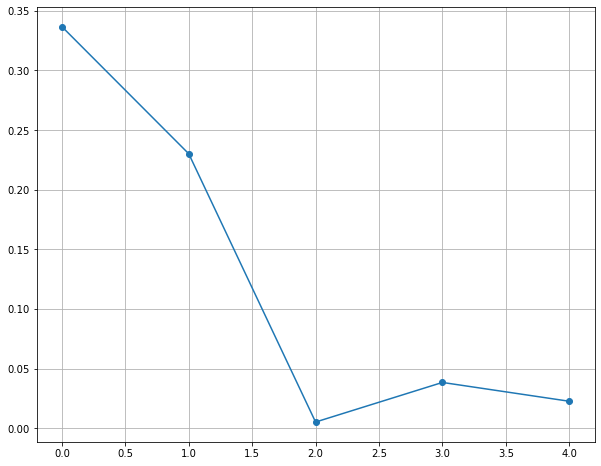

In [62]:
def CCM(X,y, L=[50,100,150,200,250]):
    scores = []
    for l in L:
        knn = KNeighborsRegressor(n_neighbors, weights='distance', metric='euclidean')
        knn.fit(X.iloc[:l], y[:l])
        y_ = knn.predict(X.iloc[l:l+100])
        scores.append(np.corrcoef(y[l:l+100].values.reshape((len(y_),)),y_.reshape((len(y_),)))[0,1]**2)
    return scores
        
scores = CCM(X,y)
pylab.plot(scores,'o-');
pylab.grid()

### Adding water level series

In [63]:
nivagua = pd.read_csv('cotas.csv')
nivagua

EstacaoCodigo  NivelConsistencia        Data                 Hora  \
0         14980000                  1  01/02/2014  01/01/1900 07:00:00   
1         14980000                  1  01/02/2014  01/01/1900 17:00:00   
2         14980000                  1  01/02/2014                  NaN   
3         14980000                  1  01/01/2014  01/01/1900 07:00:00   
4         14980000                  1  01/01/2014  01/01/1900 17:00:00   
..             ...                ...         ...                  ...   
644       14980000                  2  01/11/2000                  NaN   
645       14980000                  2  01/08/2000                  NaN   
646       14980000                  2  01/07/2000                  NaN   
647       14980000                  2  01/06/2000                  NaN   
648       14980000                  2  01/05/2000                  NaN   

     MediaDiaria  TipoMedicaoCotas  Maxima  Minima  Media  DiaMaxima  ...  \
0              0                 1     NaN     NaN    NaN        NaN  ...   
1              0                 1     NaN     NaN    NaN        NaN  ...   
2              1                 1     NaN     NaN    NaN        NaN  ...   
3              0                 1   198.0   136.0  142.0       10.0  ...   
4              0                 1   198.0   136.0  142.0       10.0  ...   
..           ...               ...     ...     ...    ...        ...  ...   
644            1                 1   175.0   133.0  140.0        6.0  ...   
645            1                 1   148.0   148.0  148.0        1.0  ...   
646            1                 1   154.0   148.0  148.0        1.0  ...   
647            1                 1   148.0   147.0  148.0        1.0  ...   
648            1                 1     NaN     NaN    NaN        NaN  ...   

     Cota22Status  Cota23Status  Cota24Status  Cota25Status  Cota26Status  \
0             1.0           1.0           1.0           1.0           0.0   
1             1.0           1.0           1.0           1.0           0.0   
2             1.0           1.0           1.0           1.0           0.0   
3             1.0           1.0           1.0           1.0           1.0   
4             1.0           1.0           1.0           1.0           1.0   
..            ...           ...           ...           ...           ...   
644           1.0           1.0           1.0           1.0           1.0   
645           1.0           1.0           1.0           1.0           1.0   
646           2.0           1.0           2.0           2.0           2.0   
647           1.0           2.0           1.0           1.0           1.0   
648           2.0           1.0           1.0           2.0           1.0   

     Cota27Status  Cota28Status  Cota29Status  Cota30Status  Cota31Status  
0             0.0           0.0           0.0           0.0           0.0  
1             0.0           0.0           0.0           0.0           0.0  
2             0.0           0.0           0.0           0.0           0.0  
3             1.0           1.0           1.0           1.0           1.0  
4             1.0           1.0           1.0           1.0           1.0  
..            ...           ...           ...           ...           ...  
644           1.0           1.0           1.0           1.0           NaN  
645           1.0           1.0           1.0           1.0           1.0  
646           2.0           2.0           2.0           2.0           2.0  
647           1.0           1.0           1.0           1.0           NaN  
648           1.0           1.0           1.0           1.0           2.0  

[649 rows x 78 columns]

In [64]:
nivagua['Data'] = pd.to_datetime(nivagua.Data)

In [65]:
nivagua.set_index('Data',inplace=True)

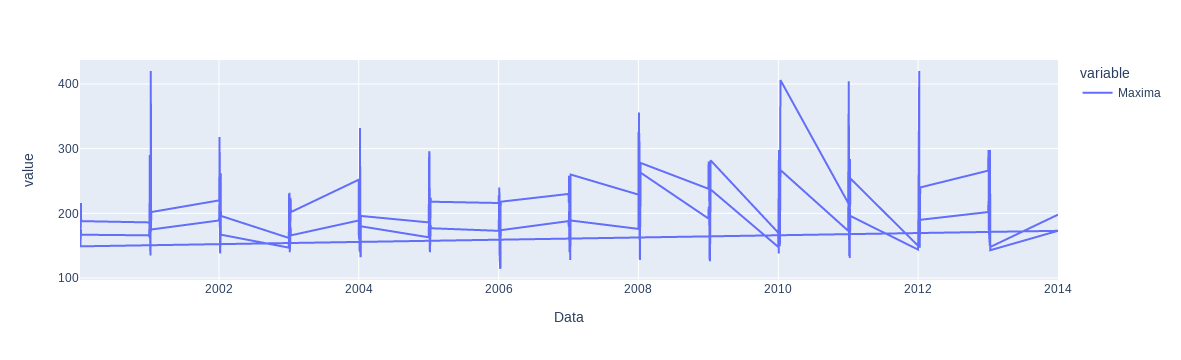

In [66]:
nivagua.Maxima.dropna().plot()

### Loading Rain series 
To check for causality from rain$\rightarrow$disease, we have obtained a 10-year series of precipitation in Manaus.

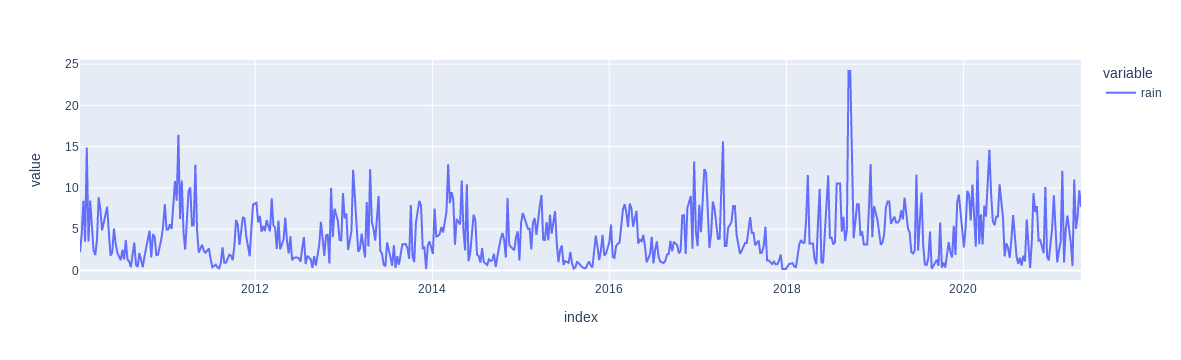

In [68]:
rain = pd.read_parquet('manaus_rain_2010_21.parquet')
fig = rain.plot();
fig.show()

Let's start by checking for correlation between rain and the two diseases we have.

First for dengue.

In [69]:
dengueseries.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='DT_SIN_PRI', length=365, freq='W-SUN')

In [73]:
rain.index

DatetimeIndex(['2010-01-08', '2010-01-15', '2010-01-22', '2010-01-29',
               '2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12',
               ...
               '2021-02-26', '2021-03-05', '2021-03-12', '2021-03-19',
               '2021-03-26', '2021-04-02', '2021-04-09', '2021-04-16',
               '2021-04-23', '2021-04-30'],
              dtype='datetime64[ns]', length=591, freq=None)

Text(0, 0.5, 'dengue cases')

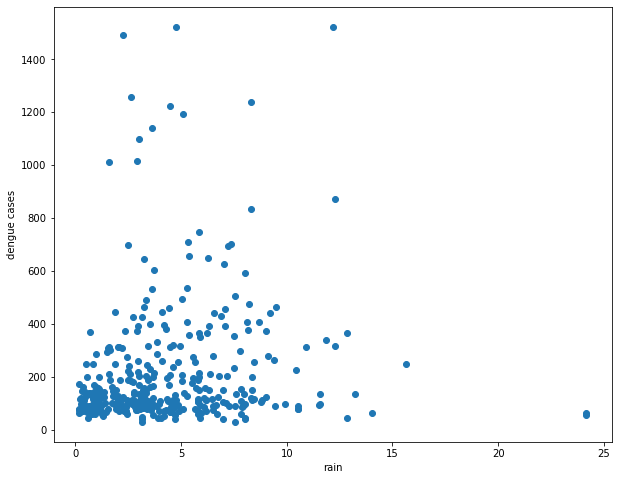

In [70]:
pylab.scatter(rain.loc['2013-01-06':'2019-12-29'].values[:,0], dengueseries[:-1])
pylab.xlabel('rain')
pylab.ylabel('dengue cases')

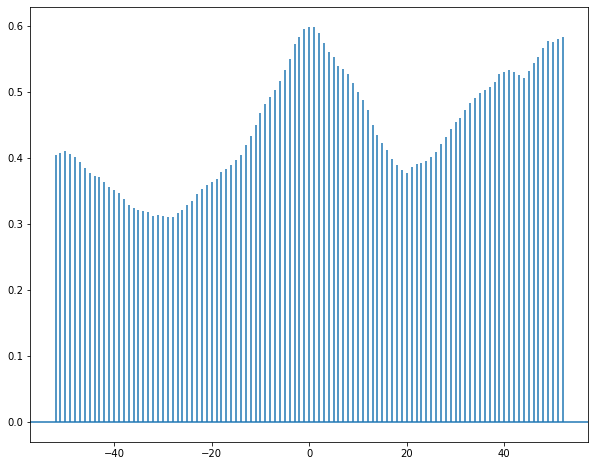

In [75]:
pylab.xcorr(rain.loc['2013-01-06':'2019-12-29'].values.ravel(), dengueseries.values.ravel()[:-1],maxlags=52);

Now for Malaria.

Text(0, 0.5, 'malaria cases')

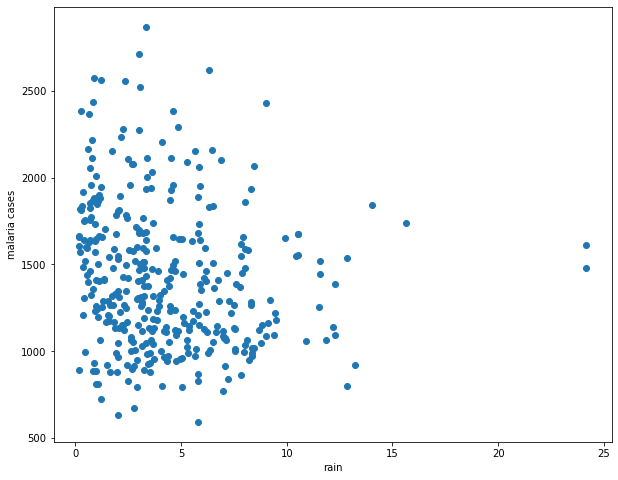

In [76]:
pylab.scatter(rain.loc['2013-01-06':'2019-12-29'].values[:,0], malseries[:-1])
pylab.xlabel('rain')
pylab.ylabel('malaria cases')

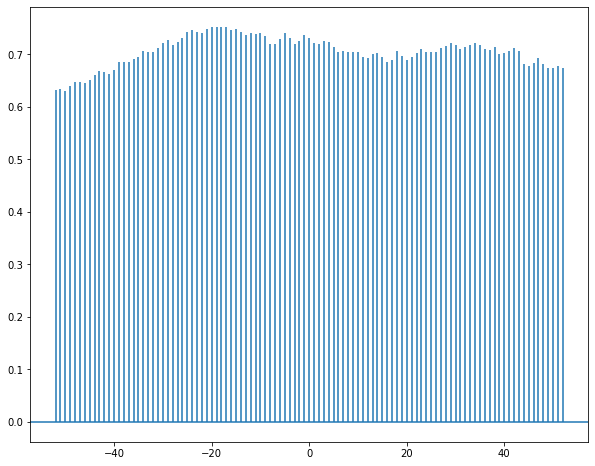

In [77]:
pylab.xcorr(rain.loc['2013-01-06':'2019-12-29'].values[:,0], malseries.values[:-1,0],maxlags=52);

{'Delay': 3, 'Dimension': 6, 'Tolerance': 2.4769353580474855}

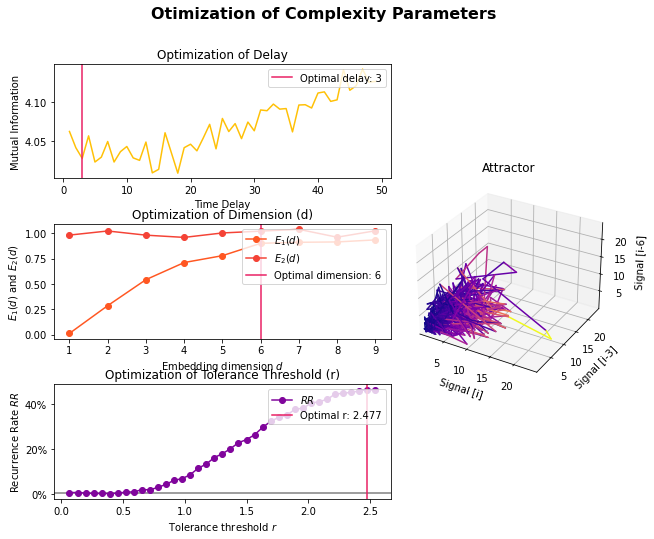

In [78]:
parameters = nk.complexity_optimize(rain.values[:,0], show=True)
parameters

In [79]:
rainseries = rain.loc['2013-01-06':'2019-12-29']
rainrec = pd.DataFrame(data={'rain':rainseries.values[:,0]})
tau = 3
rainrec['lag1'] = rainrec.rain.shift(1*tau)
rainrec['lag2'] = rainrec.rain.shift(2*tau)
rainrec['lag3'] = rainrec.rain.shift(3*tau)
rainrec['lag4'] = rainrec.rain.shift(4*tau)
rainrec['lag5'] = rainrec.rain.shift(5*tau)
rainrec = rainrec.dropna()
rainrec

rain       lag1      lag2      lag3       lag4       lag5
15   5.862852   8.284560  4.452750  5.109393   4.772798   6.884096
16   5.033279   2.909503  3.017851  2.254178  12.196395   2.490940
17   3.616692  12.269293  1.582952  2.621246   8.306649   3.631869
18   6.310549   5.862852  8.284560  4.452750   5.109393   4.772798
19   9.004406   5.033279  2.909503  3.017851   2.254178  12.196395
..        ...        ...       ...       ...        ...        ...
359  1.878122   2.212047  0.344608  5.809958   0.945628   4.717601
360  8.191114   1.572392  1.884104  0.343829   1.292331   0.199436
361  9.193491   5.393200  3.423599  0.936166   0.558773   0.572532
362  7.065355   1.878122  2.212047  0.344608   5.809958   0.945628
363  4.937219   8.191114  1.572392  1.884104   0.343829   1.292331

[349 rows x 6 columns]

In [80]:
n_neighbors = 3
X = rainrec[['rain','lag1','lag2','lag3','lag4','lag5']]
y = dengueseries[5*tau:-1]
knn = KNeighborsRegressor(n_neighbors, weights='distance', metric='euclidean')
knn.fit(X.iloc[:200], y[:200])
y_ = knn.predict(X.iloc[200:])

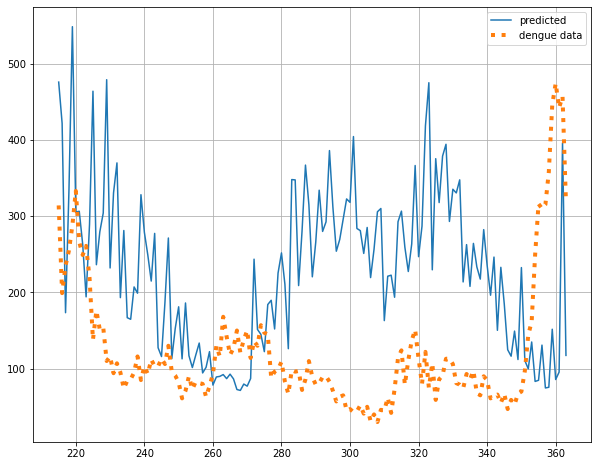

In [82]:
pylab.plot(X.index[200:],y_, label='predicted')
pylab.plot(X.index[200:],y.values[200:],':',lw=4,label='dengue data')
pylab.grid()
pylab.legend();

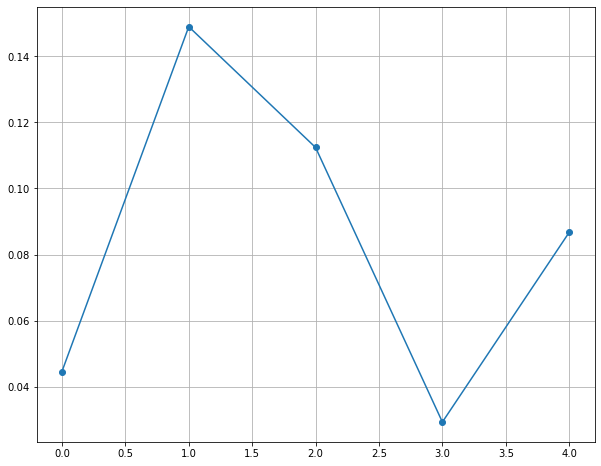

In [83]:
scores = CCM(X,y)
pylab.plot(scores,'o-');
pylab.grid()

In [84]:
n_neighbors = 3
X = rainrec[['rain','lag1','lag2','lag3','lag4','lag5']]
y = malseries[5*tau:-1]
knn = KNeighborsRegressor(n_neighbors, weights='distance', metric='euclidean')
knn.fit(X.iloc[:200], y[:200])
y_ = knn.predict(X.iloc[200:])

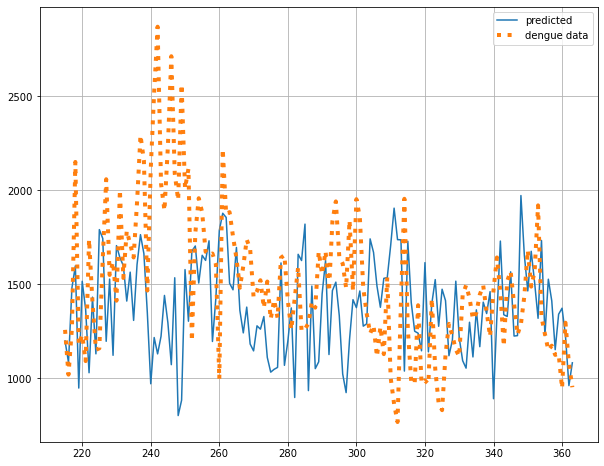

In [85]:
pylab.plot(X.index[200:],y_, label='predicted')
pylab.plot(X.index[200:],y.values[200:],':',lw=4,label='dengue data')
pylab.grid()
pylab.legend();

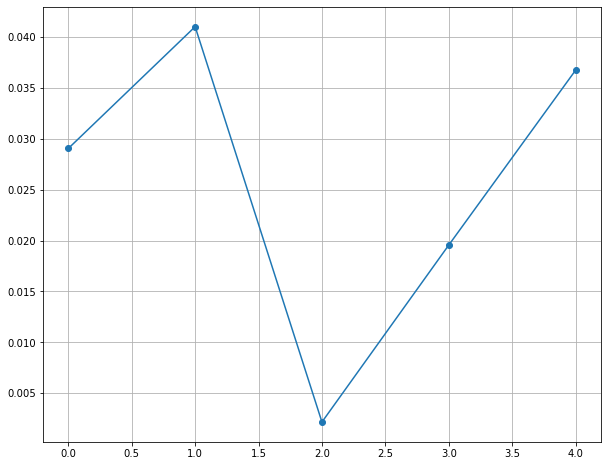

In [86]:
scores = CCM(X,y)
pylab.plot(scores,'o-');
pylab.grid()